# Explore here

Objetivo del proyecto:

Desarrollar un modelo de clasificación (inicialmente usando regresión logística) que prediga si un cliente contratará un depósito a largo plazo (y), basado en características personales, socioeconómicas y del historial de campañas anteriores.

Hipotesis:

Existen caracteristicas del cliente que permiten predecir de manera significativa si contratara un depositov a LP.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.(style="whitegrid")

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv", sep=';')

# Verificamos columnas separadas correctamente
print(df.columns.tolist())

['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']


In [23]:
df.head().T

,0,1,2,3,4
age,56,57,37,40,56
job,housemaid,services,services,admin.,services
marital,married,married,married,married,married
education,basic.4y,high.school,high.school,basic.6y,high.school
default,no,unknown,no,no,no
housing,no,no,yes,no,no
loan,no,no,no,no,yes
contact,telephone,telephone,telephone,telephone,telephone
month,may,may,may,may,may
day_of_week,mon,mon,mon,mon,mon


In [24]:
print(df.head(5))

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                                                        Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                        --------------  ----- 
 0   age;"job";"marital";"education";"default";"housing";"loan";"contact";"month";"day_of_week";"duration";"campaign";"pdays";"previous";"poutcome";"emp.var.rate";"cons.price.idx";"cons.conf.idx";"euribor3m";"nr.employed";"y"  41188 non-null  object
dtypes: object(1)
memory usage: 321.9+ KB


In [7]:
df.describe()

,"age;""job"";""marital"";""education"";""default"";""housing"";""loan"";""contact"";""month"";""day_of_week"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""emp.var.rate"";""cons.price.idx"";""cons.conf.idx"";""euribor3m"";""nr.employed"";""y"""
count,41188
unique,41176
top,"36;""retired"";""married"";""unknown"";""no"";""no"";""no..."
freq,2


In [25]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

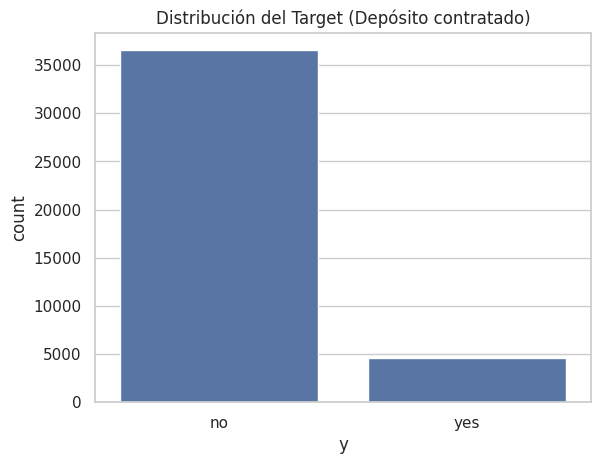

y
no     88.734583
yes    11.265417
Name: proportion, dtype: float64


In [26]:
sns.countplot(data=df, x='y')
plt.title('Distribución del Target (Depósito contratado)')
plt.show()

print(df['y'].value_counts(normalize=True) * 100)


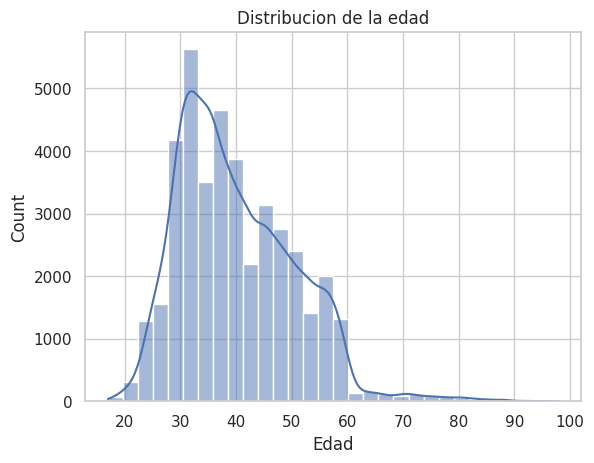

In [27]:
plt.Figure(figsize=(10,5))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Distribucion de la edad')
plt.xlabel('Edad')
plt.show()



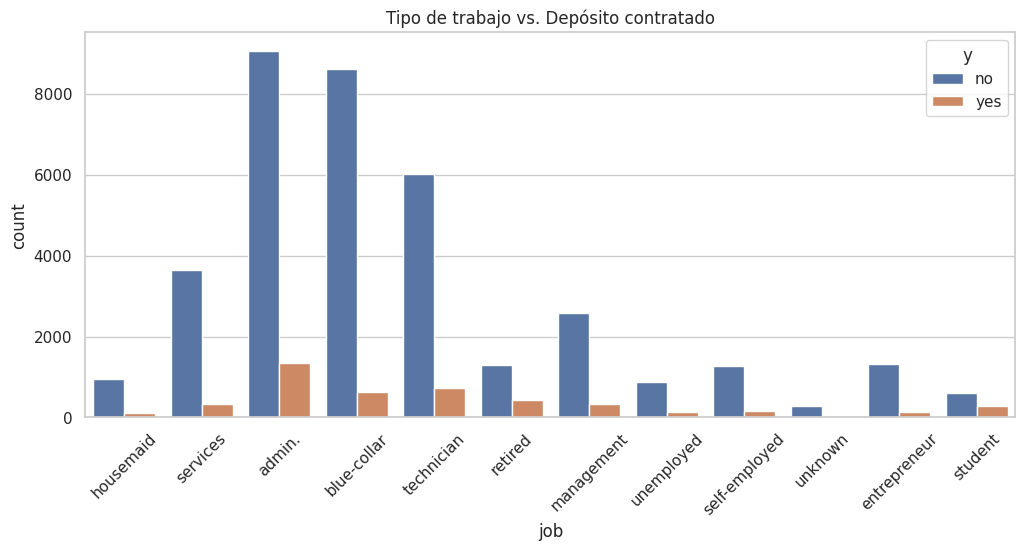

In [28]:

plt.figure(figsize=(12, 5))
sns.countplot(data=df, x='job', hue='y')
plt.title("Tipo de trabajo vs. Depósito contratado")
plt.xticks(rotation=45)
plt.show()


In [29]:
cat_vars = ['job', 'marital', 'education', 'default', 'housing', 'loan', 
            'contact', 'month', 'day_of_week', 'poutcome']

for var in cat_vars:
    print(f"\n{var}:\n", df[var].value_counts())



job:
 job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

marital:
 marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64

education:
 education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64

default:
 default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64

housing:
 housing
yes        21576
no         18622
unknown      990
Name: count, dtype: int64

loan:
 loan
no         33950
yes         6248
unknown      990
Name: count, dtype: int64

contac

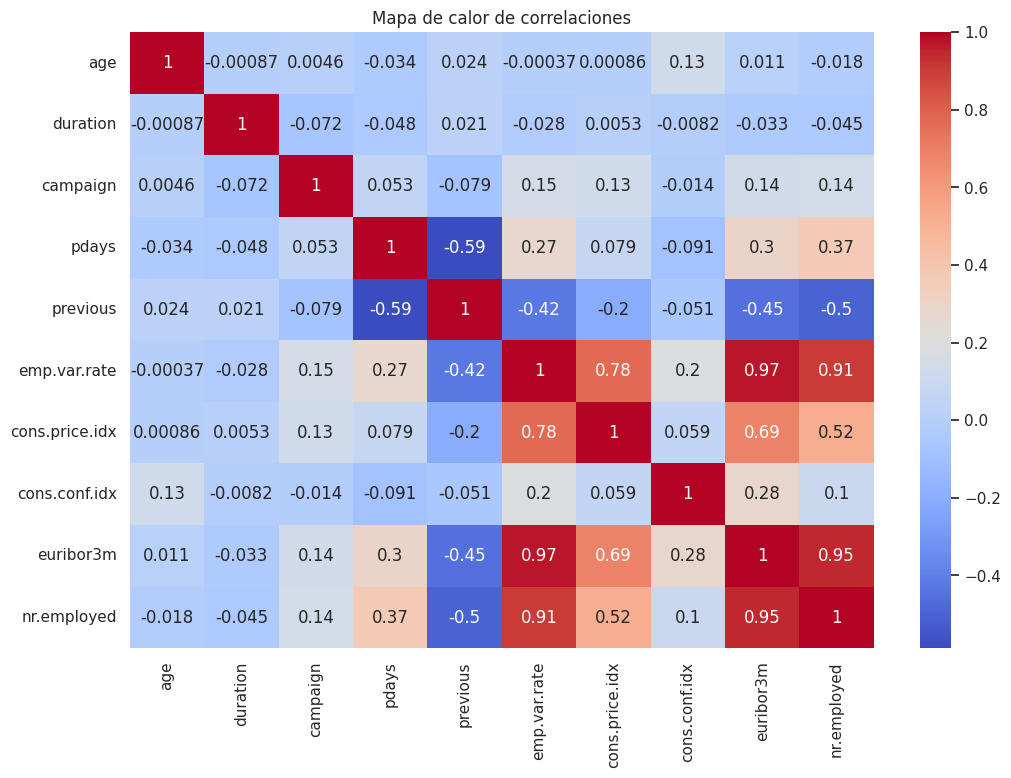

In [30]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Mapa de calor de correlaciones")
plt.show()


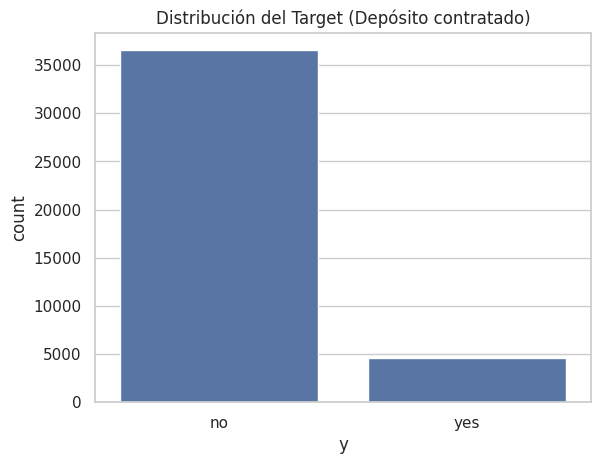

y
no     88.734583
yes    11.265417
Name: proportion, dtype: float64


In [31]:
sns.countplot(data=df, x='y')
plt.title('Distribución del Target (Depósito contratado)')
plt.show()

print(df['y'].value_counts(normalize=True) * 100)


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd


df['y'] = df['y'].map({'yes': 1, 'no': 0})
df_encoded = pd.get_dummies(df, drop_first=True)

X = df_encoded.drop('y', axis=1)
y = df_encoded['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[10681   284]
 [  804   588]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10965
           1       0.67      0.42      0.52      1392

    accuracy                           0.91     12357
   macro avg       0.80      0.70      0.74     12357
weighted avg       0.90      0.91      0.90     12357



In [33]:
model_balanced = LogisticRegression(max_iter=1000, class_weight='balanced')
model_balanced.fit(X_train_scaled, y_train)

y_pred_bal = model_balanced.predict(X_test_scaled)

print(confusion_matrix(y_test, y_pred_bal))
print(classification_report(y_test, y_pred_bal))


[[9407 1558]
 [ 140 1252]]
              precision    recall  f1-score   support

           0       0.99      0.86      0.92     10965
           1       0.45      0.90      0.60      1392

    accuracy                           0.86     12357
   macro avg       0.72      0.88      0.76     12357
weighted avg       0.92      0.86      0.88     12357



In [35]:
pip install imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.4/238.4 kB 13.6 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.1.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [36]:
from imblearn.over_sampling import SMOTE

# Aplicar SMOTE al set de entrenamiento
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_train_scaled, y_train)

# Entrenar nuevo modelo
model_smote = LogisticRegression(max_iter=1000)
model_smote.fit(X_resampled, y_resampled)

y_pred_smote = model_smote.predict(X_test_scaled)

print(confusion_matrix(y_test, y_pred_smote))
print(classification_report(y_test, y_pred_smote))


[[9464 1501]
 [ 147 1245]]
              precision    recall  f1-score   support

           0       0.98      0.86      0.92     10965
           1       0.45      0.89      0.60      1392

    accuracy                           0.87     12357
   macro avg       0.72      0.88      0.76     12357
weighted avg       0.92      0.87      0.88     12357



Conclusiones:

Ambos métodos (class_weight y SMOTE) mejoraron notablemente la detección de clientes que sí contratan (yes).

Se pierde algo de accuracy general, pero se gana mucho en sensibilidad (recall), que es clave en este caso.

En marketing, se podria considerar que es mejor tener falsos positivos (y llamar de más) que perder clientes que sí habrían contratado.

Conclusiones Finales

Alta desproporción de clases: Solo ~11% de los clientes contrata el depósito → requiere técnicas de balanceo.

Regresión logística base tuvo buena accuracy, pero bajo recall para clientes interesados (yes).

Con class_weight='balanced' y SMOTE,  se mejoross significativamente la capacidad del modelo para detectar a quienes sí contratarían.

El modelo es ahora más útil para campañas reales porque minimiza la pérdida de oportunidades.